### 1. Introduction: Main Objective of the Analysis

In this project our main object is implementing linear regression models on a house pricing data set. The project's will focus on prediction. After preprocessing, we will use simple linear regression and then will use Ridge and LASSO regularizations.

### 2. Brief Description of Data Set and Summary of Attributes

The data set which is used for this project was obtained from kaggle web site: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

According to the data set we have a taget value called "SalePrice" and it shows the property's sale price in dollars. When it comes to attributes, we have 81 columns which include both numeric and categoric values. 

The first ten attributes and their explanations is seen below.

* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration

### 3. Data Preprocessing

In [79]:
# import packeges

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import warnings

# warnings
warnings.filterwarnings("ignore")

# seaborn default set
sns.set()

# 'png' set
%config InlineBackend.figure_format = 'png' 
%matplotlib inline

# data set paths
trainData = 'data/train.csv'
testData = 'data/test.csv'

# data set import
train = pd.read_csv(trainData, header=0)
test = pd.read_csv(testData, header=0)

In [80]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [81]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [82]:
# concatenate all data without Id and SalePrice columns
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'], 
                      test.loc[:,'MSSubClass':'SaleCondition']))

In [83]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


#### Data Cleaning: Outliers

In [84]:
train['GrLivArea'].describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

As seen above, 

Mean of "GrLivArea" : 1515.46.

Std Dev: 525.48.

3 sigma: 525.48 * 3 = 1576.44

All values above 3100 for "GrLivArea" are outliers.

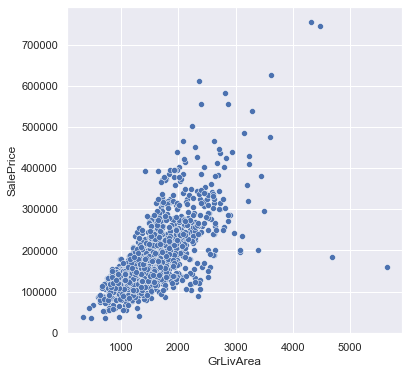

In [85]:
# shape of figure
rcParams['figure.figsize'] = (6.0, 6.0) 

# seaborn visualization
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train)

plt.show()

In [86]:
# shape before dropping outliers

train.shape

(1460, 81)

In [87]:
# drop outliers
train = train.drop(train[(train['GrLivArea']>3200)].index).reset_index(drop=True)

In [88]:
# shape after dropping outliers

train.shape

(1447, 81)

In [89]:
# concatenate all data after dropping outliers

all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'], test.loc[:,'MSSubClass':'SaleCondition']))

In [90]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


#### Transforming numeric columns to String

"MSSubClass", "OverallCond", "YrSold" ve "MoSold" columns are seen as numeric, but in fact they are categorical and should be transformed to string type.

In [91]:
all_data['YrSold']

0       2008
1       2007
2       2008
3       2006
4       2008
        ... 
1454    2006
1455    2006
1456    2006
1457    2006
1458    2006
Name: YrSold, Length: 2906, dtype: int64

In [92]:
# type transforms

all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

#### Encoding Categoric Columns via LabelEncoder

In [93]:
from sklearn.preprocessing import LabelEncoder

In [94]:
# columns to be encode

cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

In [95]:
# encoding 'cols' by means of for-loop

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

In [96]:
# let's see all columns

all_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [97]:
# shape of data before OneHotEncoder

all_data.shape

(2906, 79)

In [98]:
# şone hot encoder via get_dummies()

all_data = pd.get_dummies(all_data)

In [99]:
# shape of data after OneHotEncoder 

all_data.shape

(2906, 219)

In [100]:
# let's see the newcomer columns

all_data.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=219)

#### Normalization

Distribution of target value is right skewed.

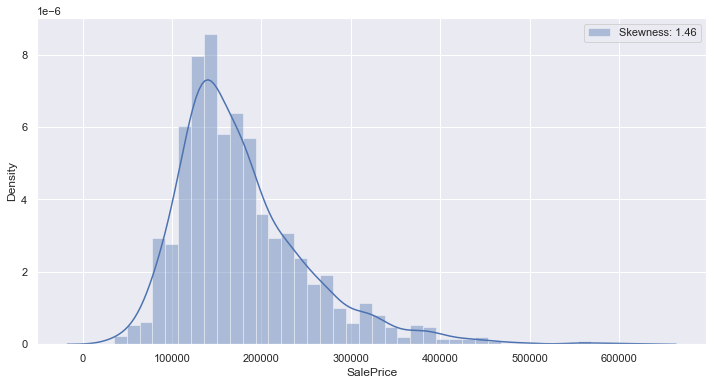

In [101]:
# skew function
from scipy.stats import skew

# histogram for "SalePrice" 

rcParams['figure.figsize'] = (12.0, 6.0) # şeklin boyutu

g = sns.distplot(train["SalePrice"], label="Skewness: %.2f"%(train["SalePrice"].skew()))

g = g.legend(loc="best")

plt.show()

We will implement Log Transform for this right skewed data for normalization.

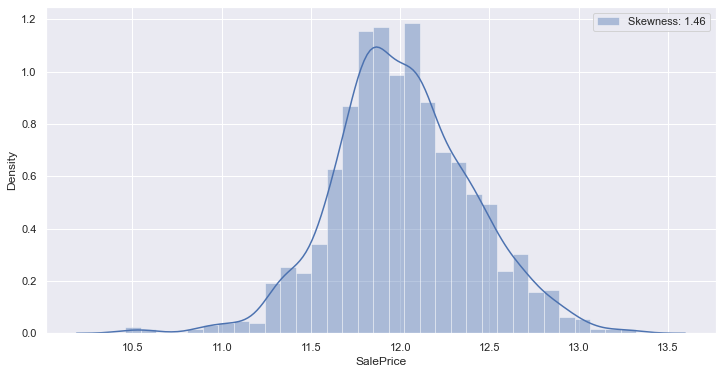

In [102]:
normalizedSalePrice = np.log1p(train["SalePrice"])

# histogram for "SalePrice" 

rcParams['figure.figsize'] = (12.0, 6.0) # şeklin boyutu

g = sns.distplot(normalizedSalePrice, label="Skewness: %.2f"%(train["SalePrice"].skew()))

g = g.legend(loc="best")

plt.show()

In [103]:
# normalized SalePrice
train["SalePrice"] = np.log1p(train["SalePrice"])

#### Missing Value Check

We will check whether there is missing value or not.

In [104]:
# checking via isnull()

all_data.isnull().any().any()

True

In [105]:
# filling mean values 

all_data = all_data.fillna(all_data.mean())

In [106]:
# checking again

all_data.isnull().any().any()

False

#### Creating matrixes for model

In [107]:
X_train = all_data[:train.shape[0]]

X_test = all_data[train.shape[0]:]

y = train.SalePrice

In [108]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,10,65.0,8450,1,2,3,0,7,4,2003,...,0,0,0,1,0,0,0,0,1,0
1,5,80.0,9600,1,2,3,0,6,7,1976,...,0,0,0,1,0,0,0,0,1,0
2,10,68.0,11250,1,2,0,0,7,4,2001,...,0,0,0,1,0,0,0,0,1,0
3,11,60.0,9550,1,2,0,0,7,4,1915,...,0,0,0,1,1,0,0,0,0,0
4,10,84.0,14260,1,2,0,0,8,4,2000,...,0,0,0,1,0,0,0,0,1,0


In [109]:
X_train.shape

(1447, 219)

### Summary of Data Exploration, Data Cleaning and Feature Engineering

So far in the context of data preprocessing:

* We dropped outliers, 
* We checked missing data and fill with mean values,
* We implemented encoding and prepared data framework for linear regression model.

---

### Linear Regression Models

First, we will set a simple Linear Regression model. In order to measure the performance of our model we will use Root Mean Squared Error (RMSE) and k-fold cross validation.

**1. Simple Linear Regression**

In [110]:
from sklearn.model_selection import cross_val_score

In [111]:
# computing RMSE by means of k-fold cross validation

def rmse_cv(model, cv=5):
    rmse = np.sqrt(-cross_val_score(model, X_train, y, scoring='neg_mean_squared_error', cv=cv))
    return rmse
    

In [114]:
from sklearn.linear_model import LinearRegression

# creating linear model
linearModel = LinearRegression()

# call rmse_cv function
rmse = rmse_cv(linearModel)

# result
print("RMSE Average: {}, std: {}".format(rmse.mean(), rmse.std()))

RMSE Average: 0.12590152894768136, std: 0.012157159224612227


In [115]:
# fit linear model
linearModel.fit(X_train, y)

LinearRegression()

In [116]:
# coefficients (there should be 219 coefi)

weights = linearModel.coef_

print(weights)

[ 1.63702343e-04  5.45013638e-04  1.97472332e-06  7.88496776e-02
 -9.14286913e-03  1.73168069e-03  9.03847864e-05  4.25411998e-02
  3.87449997e-02  1.90975918e-03  6.88471877e-04  2.05964569e-05
 -2.81349215e-03  1.02943789e-02 -1.03580636e-02  6.75256675e-03
 -3.86398162e-03 -8.68334435e-04  6.79803808e-05  2.22575553e-03
  2.88641172e-05 -8.17684592e-06  8.86676475e-05 -7.23632746e-03
  6.27017954e-02  8.25020905e-05  5.57499392e-05  4.82913643e-05
  1.86543252e-04  2.83355741e-02  1.09235245e-02  2.06708478e-02
  1.78802015e-02 -3.86856693e-03 -4.63594164e-02 -1.33853323e-02
  6.06947275e-03  1.79092492e-02  1.48336771e-02 -2.57647778e-03
 -1.36000429e-04 -3.17492238e-03  2.29096432e-02  9.16562145e-05
  4.91523819e-03  3.59561883e-03  1.11224912e-02  1.01848587e-04
  1.01042734e-04  1.33077820e-04  1.56690522e-04  2.74354541e-04
  6.23113459e-04  1.60833953e-01  4.00307382e-03 -7.85991257e-06
  4.56539872e-04 -2.63818390e-03 -3.18798511e-01  1.05624467e-01
  8.48562783e-02  8.22465

In [ ]:
weights.shape

In [ ]:
# get max valued coefficients as absolute

coef = pd.Series(weights, index = X_train.columns)

# first 10 and last 10 biggest coefficients (important coefficients)
imp_coef = pd.concat([coef.sort_values().head(10), coef.sort_values().tail(10)])

In [ ]:
# let's see coef

imp_coef.plot(kind = "barh")

plt.title("Maximum Valued Coefficients")

plt.show()

**2. Ridge Regression (L2-Regularization)**

Let's take $\alpha = 0.1$ 

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
# ridge regression with alpha = 0.1 
ridgeModel = Ridge(alpha = 0.1)

# RMSE via cross validation
rmse = rmse_cv(ridgeModel)

print("RMSE Average: {}, std: {}".format(rmse.mean(), rmse.std()))

Compared to Linear Regression, Ridge Regression has smaller RMSE:

* Linear Regression -> RMSE = 0.1259
* Ridge Regression -> RMSE = 0.1241

In [ ]:
# fit linear model
ridgeModel.fit(X_train, y)

In [ ]:
# get max valued coefficients as absolute

coef_ridge = pd.Series(ridgeModel.coef_, index = X_train.columns)

# first 10 and last 10 biggest coefficients (important coefficients)
imp_coef_ridge = pd.concat([coef_ridge.sort_values().head(10), coef_ridge.sort_values().tail(10)])

In [ ]:
# let's see coefs

imp_coef_ridge.plot(kind = "barh")

plt.title("Maximum Valued Coefficients")

plt.show()

In [ ]:
# RMSE for different alphas

alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]

cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas]

cv_ridge = pd.Series(cv_ridge, index = alphas)

# RMSE vs alpha graph
cv_ridge.plot(title = "Alpha Change & Ridge Regression RMSE")

plt.xlabel("alpha")
plt.ylabel("rmse")

plt.show()

In [ ]:
optimalRidgeAlpha = cv_ridge[cv_ridge == cv_ridge.min()].index.values[0]

print("Optimal Ridge Alpha Value: {}".format(optimalRidgeAlpha))

Now let's try again with $\alpha = 10.0$

In [117]:
# ridge regression modelin RMSE with optimal alpha
ridgeModel = Ridge(alpha = optimalRidgeAlpha)

rmse = rmse_cv(ridgeModel)

print("RMSE Average: {}, std: {}".format(rmse.mean(), rmse.std()))

RMSE Average: 0.11525687438039715, std: 0.007515749124597703


In [118]:
# fit linear model
ridgeModel.fit(X_train, y)

Ridge(alpha=10.0)

In [119]:
# get max valued coefficients as absolute

coef_ridge = pd.Series(ridgeModel.coef_, index = X_train.columns)

# first 10 and last 10 biggest coefficients (important coefficients)
imp_coef_ridge = pd.concat([coef_ridge.sort_values().head(10), coef_ridge.sort_values().tail(10)])

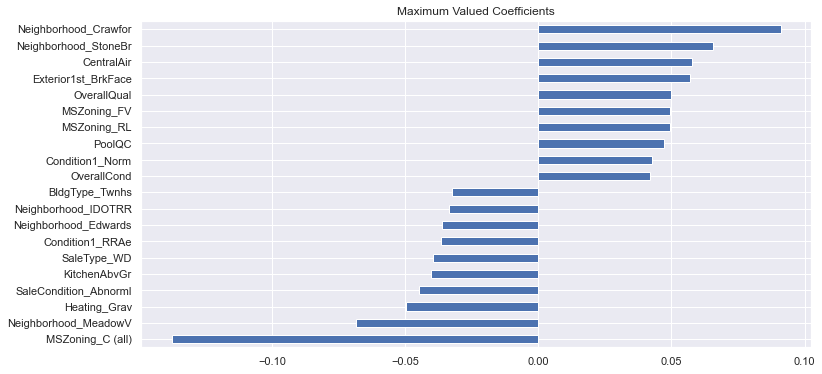

In [121]:
# let's coef

imp_coef_ridge.plot(kind = "barh")

plt.title("Maximum Valued Coefficients")

plt.show()

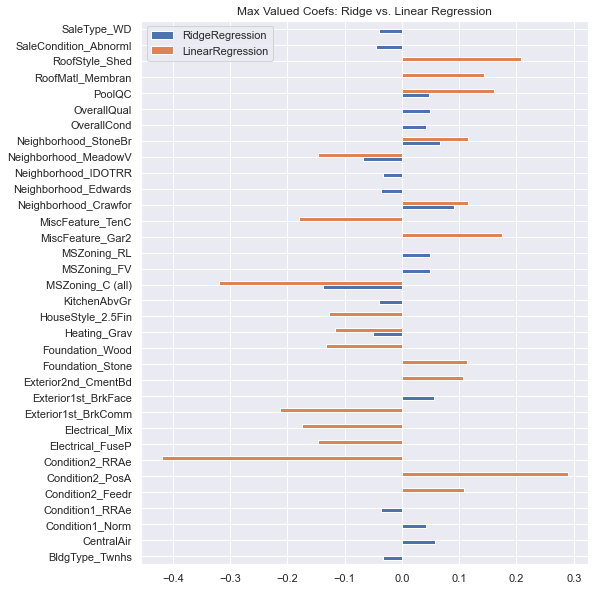

In [124]:
# maximum valued coefs
ridge_coef = pd.Series(ridgeModel.coef_, index = X_train.columns)
ridge_imp_coef = pd.concat([ridge_coef.sort_values().head(10), ridge_coef.sort_values().tail(10)])

rcParams['figure.figsize'] = (8.0, 10.0) # grafiğin boyutu

df = pd.DataFrame({ "RidgeRegression" : ridge_imp_coef, "LinearRegression" : imp_coef })

df.plot(kind = "barh")
plt.title("Max Valued Coefs: Ridge vs. Linear Regression")

plt.show()

### 3. LASSO Regression (L1-Regularization)

Let's take $\alpha = 0.1$

In [125]:
from sklearn.linear_model import Lasso

In [127]:
# determine RMSE for lasso regression model with alpha = 0.1
lassoModel = Lasso(alpha = 0.1)
rmse = rmse_cv(lassoModel)
print("RMSE Average: {}, std: {}".format(rmse.mean(), rmse.std()))

RMSE Average: 0.16050445222133877, std: 0.00475273958022816


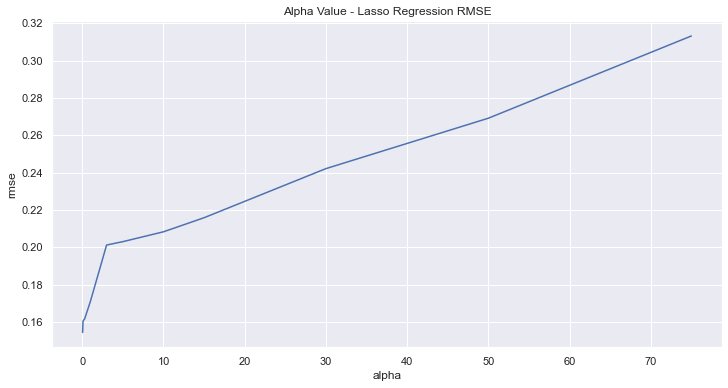

In [128]:
# computing RMSE with different alphas

alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]

cv_lasso = [rmse_cv(Lasso(alpha = alpha)).mean() for alpha in alphas]
cv_lasso = pd.Series(cv_lasso, index = alphas)

# figsize
rcParams['figure.figsize'] = (12.0, 6.0)

# plot RMSE vs alpha
cv_lasso.plot(title = "Alpha Value - Lasso Regression RMSE")
plt.xlabel("alpha")
plt.ylabel("rmse")
plt.show()

We should use LassoCV (Lasso Cross Validation) class instead of giving alphas manually.

(Hyperparameter Tuning)

In [129]:
from sklearn.linear_model import LassoCV

# finding optimum alpha via LassoCV
lassoModel = LassoCV(alphas = np.linspace(0.0002, 0.0022, 21), cv = 5).fit(X_train, y)
lassoModel.alpha_

optimalLassoAlpha = lassoModel.alpha_
print("Optimal lasso alpha: {}".format(optimalLassoAlpha))

Optimal lasso alpha: 0.0005


In [130]:
lassoModel = Lasso(alpha = optimalLassoAlpha)

rmse = rmse_cv(lassoModel)

print("RMSE Average: {}, std: {}".format(rmse.mean(), rmse.std()))

RMSE Average: 0.11297541732413333, std: 0.007183534409277972


Comaparing all RMSEs:

* Linner Regression: RMSE = 0.1259
* Ridge: RMSE = 0.1152
* Lasso: RMSE = 0.1129

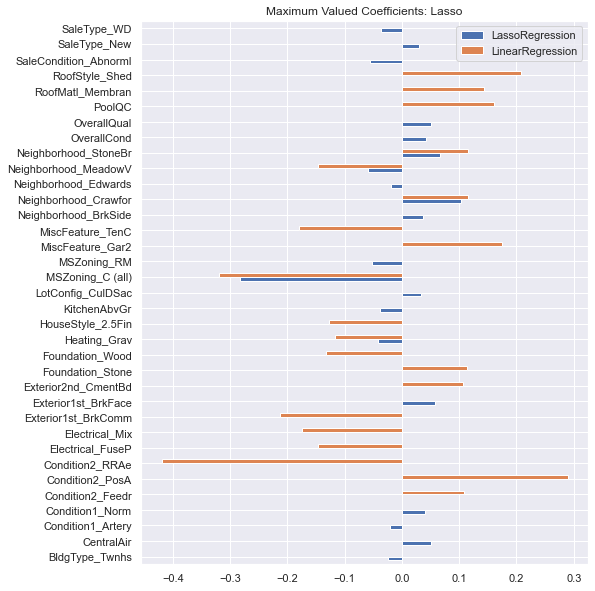

In [131]:
# fit lasso model
lassoModel.fit(X_train, y)

# max valued coefs
lasso_coef = pd.Series(lassoModel.coef_, index = X_train.columns)
lasso_imp_coef = pd.concat([lasso_coef.sort_values().head(10), lasso_coef.sort_values().tail(10)])

rcParams['figure.figsize'] = (8.0, 10.0)

df = pd.DataFrame({ "LassoRegression" : lasso_imp_coef, "LinearRegression" : imp_coef })

df.plot(kind = "barh")
plt.title("Maximum Valued Coefficients: Lasso")
plt.show()

### Conclusion:

* In this project we implemented Simple Linear Regression, Ridge regularization and Lasso Regularization and we found that LASSO gives the best results in terms of RMSE.

